##<center>  Escape Time Algorithm for Plotting Julia Set</center>##

Let $f_c:\mathbb{C}\to\mathbb{C}$ be the complex function defined by $f_c(z)=z^2+c$, where $c\in\mathbb{C}$ is a constant.  For each $z$, the  sequence $z_n=f_c^n(z)$, $n\geq 1$,
defined by iterating the function $f_c$, is
called the orbit of the point $z$..

Dropping the subscript $c$ we have:

$f^2(z)=f(f(z))=f(z^2+c)=(z^2+c)^2+c=z^4+2z^2c+c^2+c$

$f^3(z)=f(f^2(z))=(z^4+2z^2c+c^2+c)^2+c$

and so on.

For some $z\in\mathbb{C}$ the orbit $z_n=f_c^n(z)$ is bounded, while for other it tends to infinity.

A sequence $z_n$ tends to infinity if for each  $r>0$, there is a rank, $N>0$, such that the modulus  $|z_n|>r$,
for every $n>N$.

The set of points $z$ in the complex plane, for which the sequence $z_n=f_c^n(z)$ tends to $\infty$
is called  basin of attraction of $\infty$.

The filled  Julia set,  $K_c$, is the complement of the basin of attraction of infinity, and
the  Julia set, $J_c$, is the boundary of $K_c$. 

We recall a few properties of the map $f_c$, and of its Julia set  [[R Devaney, Introduction to Chaotic Dynamical Systems](http://www.amazon.com/Introduction-Chaotic-Dynamical-Systems-Edition/dp/0813340853)]:
    
    
- If $|z|> 2$, then  its orbit tends to $\infty$.
Hence the (filled) Julia set    is included in the disk, $D(0,2)$, centered at $0$ and of radius 2.

- From the  symmetry properties of the map $f_c$ it follows that its Julia set  is symmetric with respect  to origin.

The simplest algorithm to detect graphically the (filled) Julia set is the *Escape Time Algorithm*.

The  function `Julia`, defined below, implements this algorithm.
 
Fixing a maximum number of iterations, $\tt Miter$, to each $z\in\mathbb{C}$  one associates either  the smallest $n<$${\tt Miter}$, for which
$|z_n|> 2$ (i.e. the escape time) or $\tt Miter$ if  the orbit of  z does not escape from the disk $D(0,2)$ in $\tt Miter$ iterations.

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def   Julia(z,c, Miter=80):#Miter, maximum number of allowed iterations 
    for n in range(Miter):
        if  abs(z)>2:
            return n
        z = z*z + c    
    return Miter

In this IPython Notebook we illustrate the  Julia set for 8 maps, $f_c$, corresponding to the  constants, $c$, in the following  list:

In [11]:
Cs=[-0.04-0.684*1j, -0.8+0.156*1j, -0.4+0.6*1j,-0.04-1j*0.668 , -0.835-0.2321*1j, -0.70176-0.3842*1j]+\
[0.300283+0.48857*1j,-0.1+0.651 ]#-0.74543+0.11301*1j 

We define a meshgrid over the rectangle $[-1.5,1.5]\times[-1.5, 1.5]$:

In [7]:
Nx=1000
Ny=1000
a=1.5
x=np.linspace(-a, a, Nx)
y=np.linspace(-a, a, Ny)
x,y=np.meshgrid(x,y)
z=x+1j*y

For  each constant $c\in Cs$, we generate the image
associated to the `numpy.array` having as elements the escape times of the nodes $z[I][J]$,
$I, J=\overline{0,999}$, in this grid. All points having the same escape time are colored with the same color.

The colormaps used for the 8 images are given in the following list
(for more colormaps [see the matplotlib page](http://matplotlib.org/users/colormaps.html)).


In [ ]:
cmp=['RdGy', 'cubehelix', 'gnuplot', 'gist_heat', 'gist_earth','terrain']+\
['RdGy', 'gist_earth']

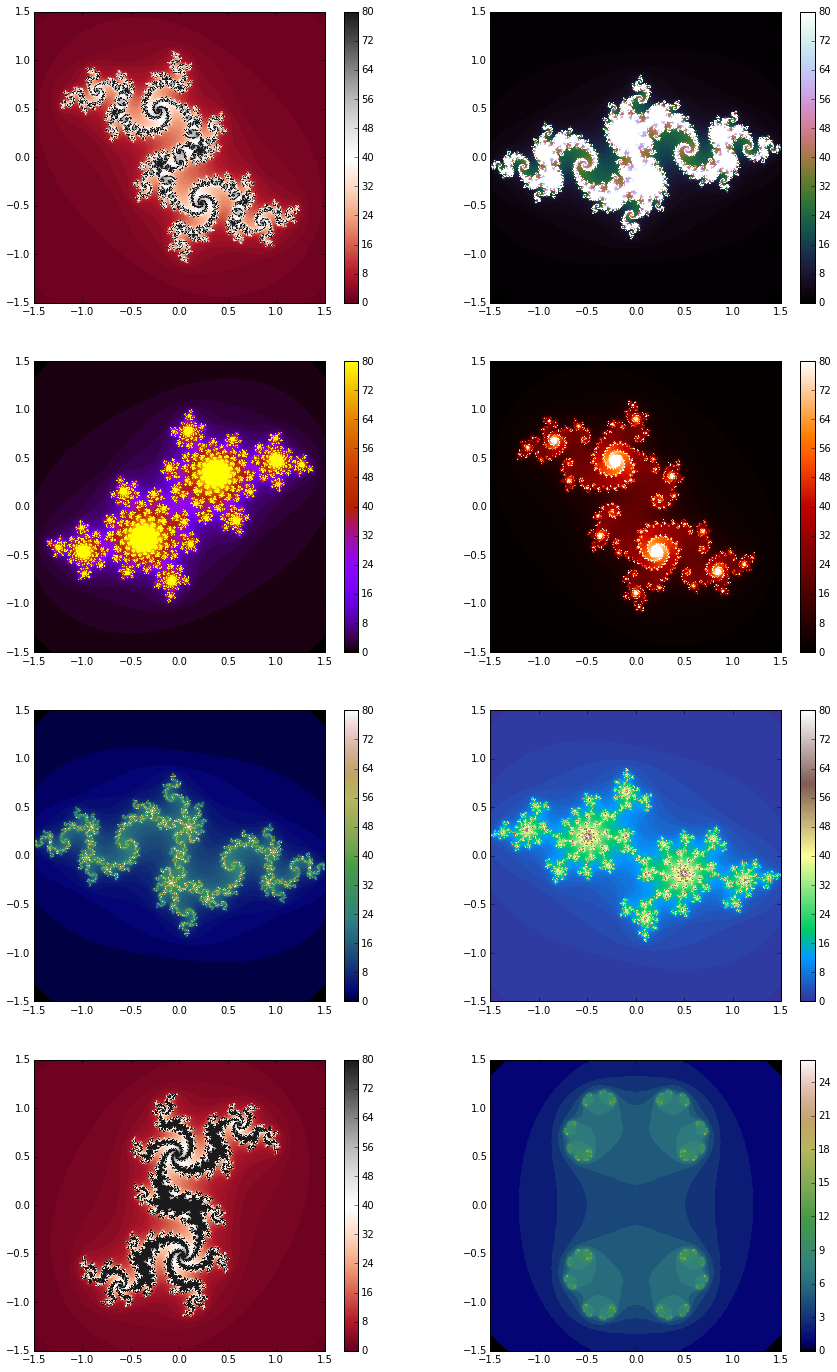

In [10]:
fig = plt.figure(figsize=(15,24))
splot = 420
for k in range(8):
    splot+=1
    ax = fig.add_subplot(splot)
    img=np.array([Julia (z[I,J], Cs[k])    for I in range(Ny)    for J in range(Nx)]).reshape(Ny, Nx)
    im=ax.imshow(img, cmap=cmp[k], extent=[-1.5, 1.5, -1.5, 1.5], interpolation="nearest")
    fig.colorbar(im, ax=ax)

Emilia Petrisor

In [53]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()